# Sales Data Exploration Using Python

###Tools Used:
- Python
- Pandas
- Matplotlib

### Dataset:
kaggle - Sample Superstore

##Objective
To Explore Sales Data , Clean Data , Calculate Basic Statistics And Visualize Sales Trend

Step 1 : Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Step 2 : Load CSV File Using Pandas

In [ ]:
!ls data

Sample-Superstore.csv


In [ ]:
df = pd.read_csv("/content/data/Sample-Superstore.csv", encoding="latin1")

In [ ]:
#Preview Data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Check Data Size
df.shape

(9994, 21)

**Data Cleaning**

In [ ]:
#Check Missing Calue of Column
missing_values = df.duplicated().sum()
print("Missing Values Per Column: ",missing_values)

Missing Values Per Column:  0


In [ ]:
# Get Information - Column & Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#Check The Missing Values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**Basic Statistics on Sales**


In [ ]:
df['Sales'].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


**Calculate Total Sales**

In [ ]:
total_sale = df['Sales'].sum()
total_sale

np.float64(2297200.8603000003)

**Calculate Average Order Value**

In [ ]:
average_order_value = df.groupby('Order ID')['Sales'].sum().mean()
average_order_value

np.float64(458.61466566180883)

**Sales By Category**

In [ ]:
sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_category

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


**Bar Chart Sales By Category**

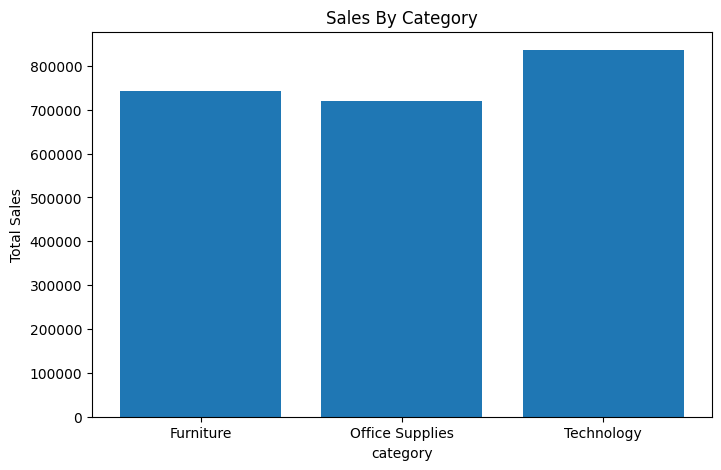

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_category.index,sales_by_category.values)
plt.title('Sales By Category')
plt.xlabel('category')
plt.ylabel('Total Sales')
plt.show()

**Convert Order Date To Datetime**

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

**Line Chart Sales Over Time Data**

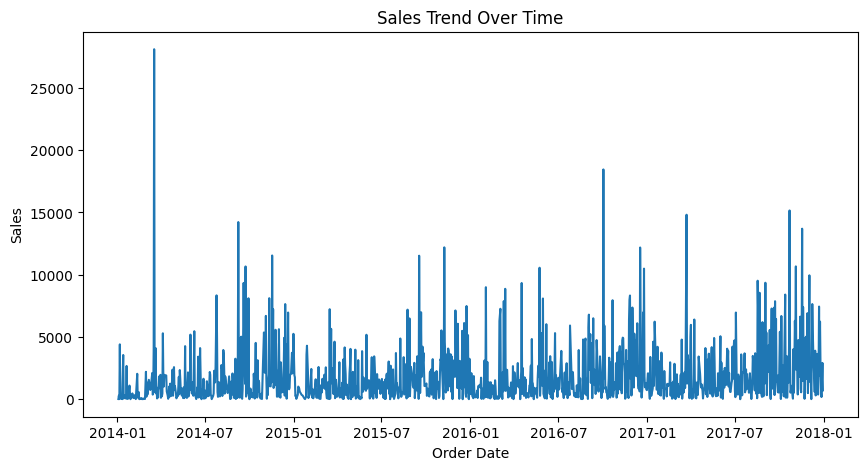

In [ ]:
sales_by_category = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(10,5))
plt.plot(sales_by_category)
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

##  Data Insights

- Technology Category Generate The Highest Sales
- Sales Shows Clear Fluctuations over time
- Average Order Value Provide Pricing Insight